# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{eqnarray}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{eqnarray}
V(t) \to E
\end{eqnarray}

cuando

\begin{eqnarray}
V(t) > V_u
\end{eqnarray}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

## Unidades

* p = pico = $10^{-12}$
* n = nano = $10^{-9}$
* $\mu$ = micro = $10^{-6}$
* m = mili = $10^{-3}$
* ...
* k = kilo = $10^{3}$
* M = Mega = $10^{6}$
* G = Giga = $10^{9}$
* T = Tera = $10^{12}$

### Ley de Ohm

Si $\Omega$ = Ohmio, V = Voltio y A = Amper, entonces

$$ 1\, Ohm = 1 \Omega = \frac{1 V}{1 A} $$

### Ley RC

Si s = segundos y F = Faradios, entonces

$$ 1 s = 1 \Omega \times 1 F $$

### Hertz

Si Hz = Hertz, luego

$$ 1 Hz = \frac{1}{1 s} $$

In [ ]:
# Librerías a usar
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [ ]:
# Euler
def euler(f,x,t,h,p=0):
  if callable(x)==True:
    return x(t)+f(x(t),t,p)*h
  else:
    return x+f(x,t,p)*h

# Integrador
def integrador_ode(m, f, x_0, a, b, k, p=0, c=lambda x,t,p: x):
  w = np.zeros((k+1,len(x_0)))
  t = np.zeros(k+1)
  w[0,:] = x_0
  t[0] = a
  h = (b-a)/k
  for j in range(1,k+1):
    t[j] = a + j*h
    w[j,:] = m(f,w[j-1,:],t[j-1],h,p)
    w[j,:] = c(w[j,:],t[j-1],p)
  return t,w

# RK4 (Runge-Kutta)
def RK4(f,x,t,h,p=0):
  k1 = f(x,t,p)
  k2 = f(x+h*k1/2,t+h/2,p)
  k3 = f(x+h*k2/2,t+h/2,p)
  k4 = f(x+h*k3,t+h,p)
  return x+h/6*(k1+2*k2+2*k3+k4)

# Mecanismo de disparo desactivado

**1)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**2)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**3)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**4)** Repita **1)**, **2)** y **3)** para el caso de corriente de entrada constante, $I=2$nA.

**5)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

**1)** Solución analítica con I(t) constante:

\begin{eqnarray*}
\frac{dV}{dt} &=& \frac{1}{\tau}\left(E-V(t)+RI(0)\right)\\
-\tau\frac{du}{dt} &=& u, \quad \quad u(t)=E-V(t)+RI(0)\\
\frac{du}{dt} &=& -\frac{1}{\tau}u\\
u(t) &=& Ae^{-\frac{1}{\tau}t}\\
u(t)&=&E-V(t)+RI(0)=Ae^{-\frac{1}{\tau}t}\\
V(t) &=& E+RI(0)-Ae^{-\frac{1}{\tau}t}\\
V(t) &=& E+RI(0)-(E+RI(0)-V_0)e^{-\frac{1}{\tau}t}
\end{eqnarray*}

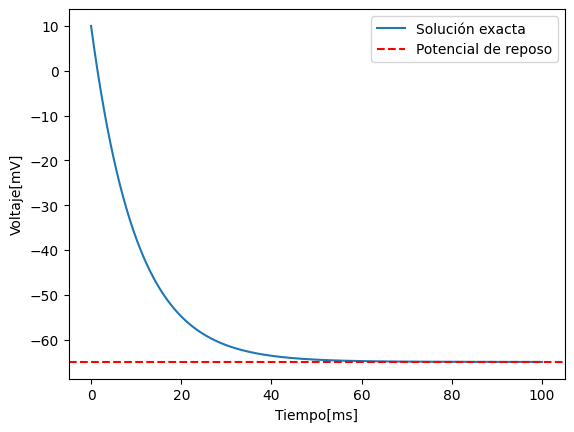

In [ ]:
# 2)
'''Primero chequeemos que las unidades corresponden
dV/dt = 1/tau (E-V(t)+R I(t))
por un lado V(t) está en mV y como t es en ms por lo que dV estará en mV/ms.
tau = 10ms
E = -65mV
R = 10M Omhs
I(t) = 1nA

por lo cual, viendo sólo unidades tenemos, 1/tau (E-V(t)+R I(t)) = 1/ms (mV-mV+M omhs*nA) = 1/ms (mV-mV+10^6 omhs*nA) =
                                                                 = 1/ms (mV-mV+10^6 V/A*nA) = 1/ms (mV-mV+10^6 V*10^-9) =
                                                                 = 1/ms (mV-mV+10^-3*10^3 mV) = 1/ms (mV-mV+mV)
por lo que la ecuacion con valores quedaría:
  1/tau (E-V(t)+R I(t)) = 1/10ms (-65mV-V(t)mV+10mV)'''


def func_exacta(t,p): #p=[\tau,E,R,I,V_0] en las unidades dadas antes
  return p[1]+p[2]*p[3]-(p[1]+p[2]*p[3]-p[4])*np.exp(-t/p[0])

# Gráfico
t = np.arange(0,100,0.01)
plt.plot(t, func_exacta(t,p=[10,-65,10,0,10]), label='Solución exacta')
plt.axhline(y=-65+10*0 , color='r', linestyle='--', label='Potencial de reposo')
plt.legend()
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.show()

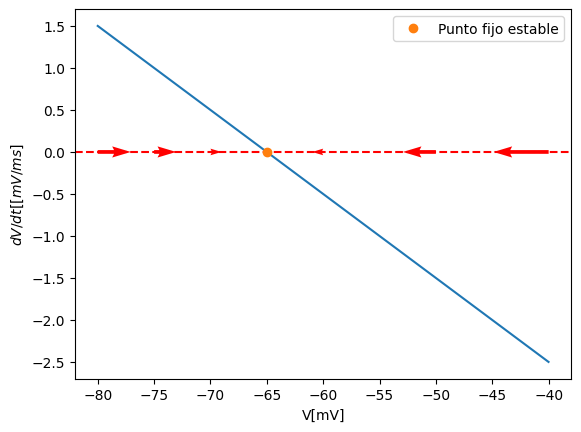

In [ ]:
# 3)
def derivada_V(v,I):
  return 1/10*(-65-v+10*I)

# Gráfico
v = np.arange(-80,-40,0.01)
plt.plot(v,derivada_V(v,0))
plt.xlabel('V[mV]')
plt.ylabel(f'$dV/dt[[mV/ms]$')
puntos = np.array([-40,-50,-60,-80,-75,-70])
plt.quiver(puntos, 0, derivada_V(puntos,0), 0, color='r')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot(-65, 0, 'o', label='Punto fijo estable')
plt.legend()
plt.show()

Una cuenca es $(-∞,-65)$ que tiene derivada positiva y por lo cual crece la potencia en dirección hacia el -65. <br>
Otra cuenca es $(-65,∞)$ que tiene derivada negativa entonces decrece la potencia en dirección hacia el -65.<br>
-65mV es un punto fijo estable.

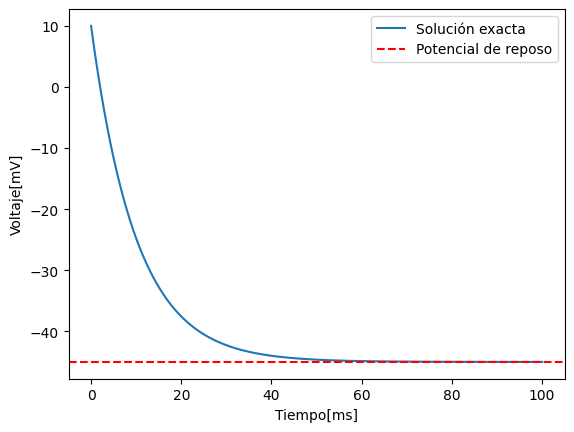

In [ ]:
# 4) Gráfico de solución exacta
t = np.arange(0,100,0.01)
plt.plot(t, func_exacta(t,p=[10,-65,10,2,10]), label='Solución exacta')
plt.axhline(y=-65+10*2, color='r', linestyle='--', label='Potencial de reposo')
plt.legend()
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.show()

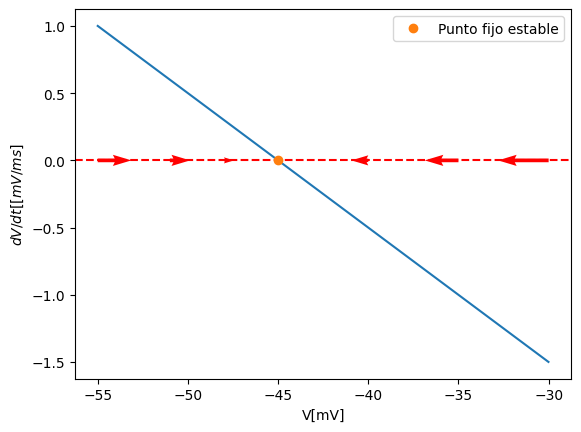

In [ ]:
# Gráfico de atractores con I=2nA
v = np.arange(-55,-30,0.01)
plt.plot(v,derivada_V(v,2))
plt.xlabel('V[mV]')
plt.ylabel(f'$dV/dt[[mV/ms]$')
plt.axhline(y=0 ,color='red', linestyle='--')
puntos = np.array([-55,-51,-48,-40,-35,-30])
plt.quiver(puntos, 0, derivada_V(puntos,2), 0, color='r')
plt.plot(-65+10*2, 0, 'o', label='Punto fijo estable')
plt.legend()
plt.show()

5) En el caso que la corriente externa sea arbitraria, la solución analítica a la ecuación diferencial se obtiene mediante el método de factor integrante.
\begin{eqnarray*}
\frac{dV}{dt}&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)\\
\frac{dV}{dt} + \frac{1}{\tau}V(t)&=& \frac{1}{\tau}(E + RI(t))
\end{eqnarray*}
Usamos el factor integrador $\mu(t) = e^{\int_{t_0}^t \frac{1}{\tau}ds} = e^{\frac{t-t_0}{\tau}}$ para resolver EDO exactas del tipo $\frac{dV}{dt} + p(t)V(t) = \frac{1}{\tau}q(t)$ con p y q funciones.
\begin{eqnarray*}
V(t) = e^{-\frac{t-t_0}{\tau}}\left[V_0 + \frac{1}{\tau}\int_{t_0}^{t}  e^{\frac{s-t_0}{\tau}}(E+RI(s))ds \right]
\end{eqnarray*}

**6)** Graficar la solución exacta de la EDO con $I=2nA$ junto con la numérica utilizando el método de integración RK4

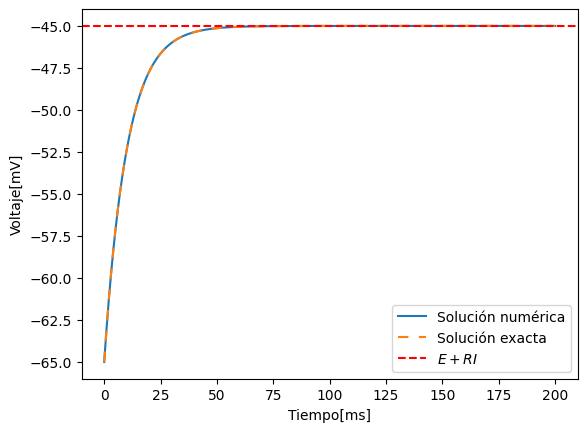

In [ ]:
# Corriente
def I(t):
  return 2

def func(x,t,p): #p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

# Gráfico de solución exacta co numérica
t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=200, k=4000, p=[10,-65,10]) #h=200/k=0.05 entonces k=4000
plt.plot(t, w[:,0], label='Solución numérica')
plt.plot(t, func_exacta(t,p=[10,-65,10,2,-65]), label='Solución exacta', linestyle='--', dashes=(5, 5))
plt.axhline(y=-65+10*2, color='r', linestyle='--', label=f'$E+RI$')
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.legend()
plt.show()

## Dinámica con mecanismo de disparo activado

**7)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**8)** Grafique la solución computada en el inciso **7)**. Incorpore al gráfico la solución exacta del inciso **1)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **7)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$, donde $V^*$ es el valor de $V$ tal que $f(V)=0$.

**9)** Para el caso indicado en el inciso **7)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **8)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**10)** Repita **7)** y **8)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**11)** Repita **7)** y **8)** con

\begin{equation*}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation*}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que el inciso anterior, no incluya la solución exacta del inciso **1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [ ]:
# 7)
# Corriente
def I(t):
  return 2

def func(x,t,p): #p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

count = 0 # Servirá para el ejercicio 9

# Mecanismo de disparo
def c(w,t,p):
  global count # Se debe referenciar el count de afuera
  if w>-50:
    count += 1
    return -65
  else:
    return w
t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=200, k=4000, p=[10,-65,10], c=c) #h=200/k=0.05 entonces k=4000
w[-1]

array([-56.65496505])

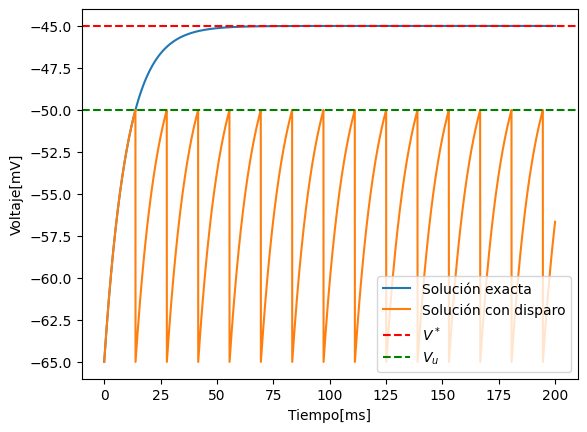

In [ ]:
# 8)
def func_exacta(t,p): #p=[\tau,E,R,I,V_0] en las unidades dadas antes
  return p[1]+p[2]*p[3]-(p[1]+p[2]*p[3]-p[4])*np.exp(-t/p[0])

# Gráfico con y sin mecanismo de disparo
plt.plot(t,func_exacta(t,p=[10,-65,10,2,-65]), label='Solución exacta')
plt.plot(t,w[:,0], label='Solución con disparo')
plt.axhline(y=-65+10*2 ,color='r', linestyle='--', label=f'$V^*$')
plt.axhline(y=-50 ,color='g', linestyle='--', label=f'$V_u$')
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.legend()
plt.show()

**9)**
El período de disparo se define como el tiempo que tarda la neurona en llegar a dispararse, en nuestro caso es el $t^*$ tal que $V(t^*)=-50mV$.
Como en el ejercicio 7 tenemos $V(0)=-65mV$ y $I(t)=I_0$ entonces <br>
$V(t) = E+RI_0-(E+RI_0+65)e^{-\frac{1}{\tau}t} = -65+10I_0-10I_0e^{-\frac{1}{10}t}$ <br>
y por lo tanto <br>
\begin{eqnarray}
V(t^*) &=& -50 \\
-65+10I_0-10I_0e^{-\frac{1}{10}t^*} &=& -50 \\
e^{-\frac{1}{10}t^*} &=& \frac{15-10I_0}{-10I_0} = -\frac{3}{2I_0}+1 \\
-\frac{1}{10}t^* &=& ln(-\frac{3}{2I_0}+1) \\
t^* &=& -10ln(-\frac{3}{2I_0}+1)
\end{eqnarray}
con $I_0=2nA$ se tiene
\begin{equation}
t^* = -10ln(-\frac{3}{4}+1) \approx 13.86ms
\end{equation}
Notar que el $período = \frac{1}{frecuencia}$ y se tiene que cumplir que $1>-\frac{3}{2I_0}+1>0$ con $I_0\geq 0$, o lo que es lo mismo, $I_0>\frac{3}{2}nA$. <br>
Para el caso $I_0 \leq \frac{3}{2}nA$ no hay frecuencia y por lo tanto la representaremos con valor $0$.


In [ ]:
# Período computado con lo observado
print('Período:', 200/count)
# Frecuencia computado con lo observado
print('Frecuencia:', count/200)

Período: 14.285714285714286
Frecuencia: 0.07


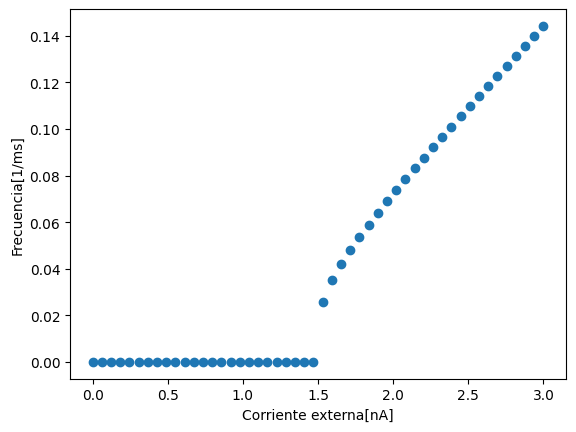

In [ ]:
# Frecuencia
def frecuencia(I_0):
  if I_0 > 3/2:
    return (1/(-10*np.log(-3/(2*I_0)+1)))
  else:
    return 0

# Gráfico de la frecuencia según la corriente externa
I_0 = np.linspace(0, 3, 50)
resultado = np.vectorize(frecuencia, otypes=[float])(I_0)
plt.scatter(I_0 ,resultado)
plt.xlabel('Corriente externa[nA]')
plt.ylabel('Frecuencia[1/ms]')
plt.show()

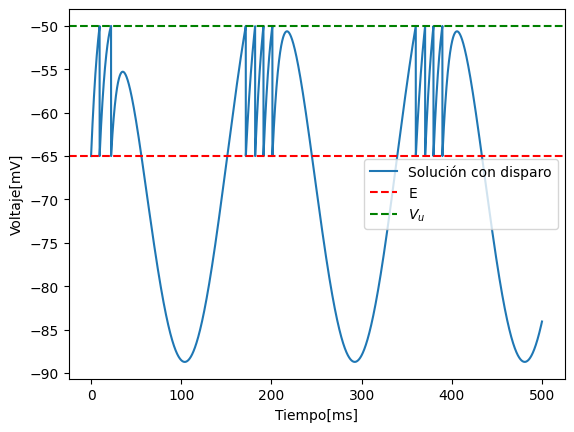

In [ ]:
# 10)
# Corriiente
def I(t):
  return 2.5*np.cos(t/30)

def func(x,t,p): # p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

# Mecanismo de disparo
def c(w,t,p):
  if w>-50:
    return -65
  else:
    return w

# Integración numérica
t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=500, k=10000, p=[10,-65,10], c=c) #h=500/k=0.05 entonces k=10000

# Gráfico de la solución con disparo
plt.plot(t, w[:,0], label='Solución con disparo')
plt.axhline(y=-65, color='r', linestyle='--', label=f'E')
plt.axhline(y=-50, color='g', linestyle='--', label=f'$V_u$')
plt.legend()
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.show()

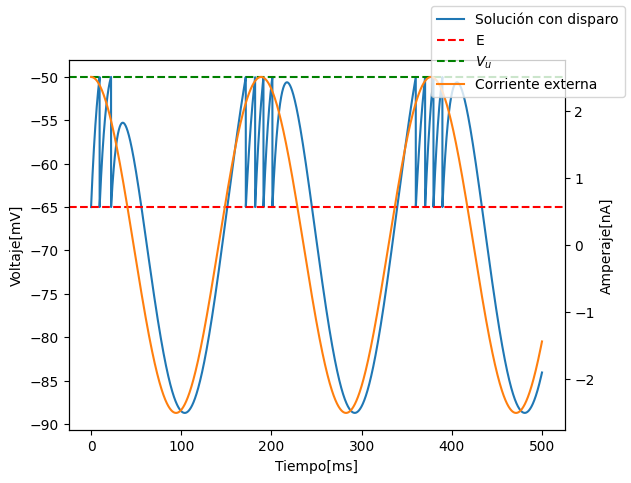

In [ ]:
# 11)
# Corriente
def I(t):
  return 2.5*np.cos(t/30)

def func(x,t,p): # p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

# Mecanismo de diparo
def c(w,t,p):
  if w>-50:
    return -65
  else:
    return w

# Integración numérica
t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=500, k=10000, p=[10,-65,10], c=c) #h=500/k=0.05 entonces k=10000

# Gráfico de la solución con disparo junto con la corriente externa
fig, ax1 = plt.subplots()

ax1.plot(t,w[:,0], label='Solución con disparo')
plt.axhline(y=-65 ,color='r', linestyle='--', label=f'E')
plt.axhline(y=-50 ,color='g', linestyle='--', label=f'$V_u$')
ax1.set_xlabel('Tiempo[ms]')
ax1.set_ylabel('Voltaje[mV]')

# Twin Axes
ax2 = ax1.twinx()
ax2.set_ylabel('Amperaje[nA]')
ax2.plot(t,I(t), label='Corriente externa', color='tab:orange')
fig.legend()
plt.show()


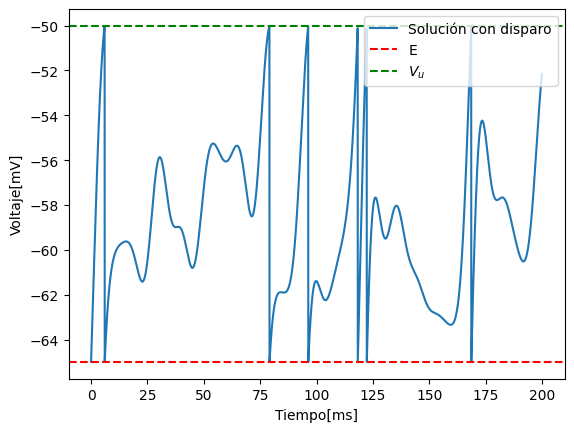

In [ ]:
# 11)
# Corriente externa
def I(t):
  return 0.35*((np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2)

def func(x,t,p): # p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

# Mecanismo de disparo
def c(w,t,p):
  if w>-50:
    return -65
  else:
    return w

t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=200, k=4000, p=[10,-65,10], c=c) #h=200/k=0.05 entonces k=4000

# Gráfico de solución con disparo
plt.plot(t,w[:,0], label='Solución con disparo')
plt.axhline(y=-65 ,color='r', linestyle='--', label=f'E')
plt.axhline(y=-50 ,color='g', linestyle='--', label=f'$V_u$')
plt.legend()
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje[mV]')
plt.show()

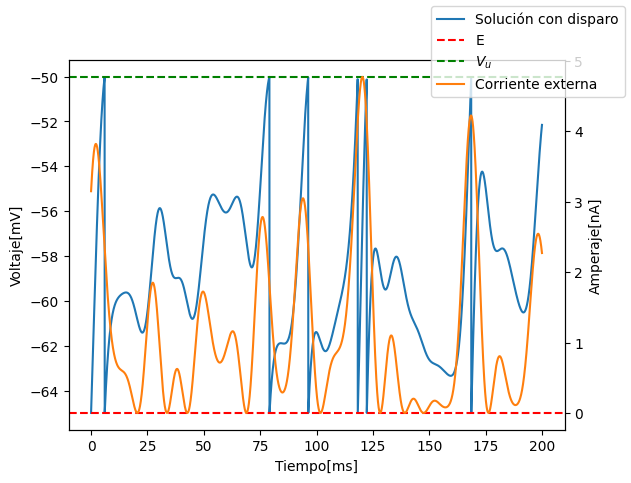

In [ ]:
# Corriente externa
def I(t):
  return 0.35*((np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2)

def func(x,t,p): #p=[\tau,E,R] en las unidades dadas antes
  return 1/p[0]*(p[1]-x+p[2]*I(t))

# Mecanismo de disparo
def c(w,t,p):
  if w>-50:
    return -65
  else:
    return w

t,w = integrador_ode(RK4, f=func, x_0=np.array([-65]), a=0, b=200, k=4000, p=[10,-65,10],c=c) #h=200/k=0.05 entonces k=4000

# Gráfico de solución con disparo y corriente externa
fig, ax1 = plt.subplots()

ax1.plot(t,w[:,0], label='Solución con disparo')
plt.axhline(y=-65 ,color='r', linestyle='--', label=f'E')
plt.axhline(y=-50 ,color='g', linestyle='--', label=f'$V_u$')
ax1.set_xlabel('Tiempo[ms]')
ax1.set_ylabel('Voltaje[mV]')

# Twin Axes
ax2 = ax1.twinx()
ax2.set_ylabel('Amperaje[nA]')
ax2.plot(t,I(t), label='Corriente externa', color='tab:orange')
fig.legend()
plt.show()